### libray inclusion

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,recall_score,roc_auc_score,auc,confusion_matrix,cohen_kappa_score, f1_score, precision_score,matthews_corrcoef 
from tqdm import tqdm
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectPercentile, f_classif, chi2, SelectFromModel, SelectKBest
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Optional imports for preprocessing and visualization
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

In [7]:

df_dl = pd.read_csv('DL_features_16-04-2024.csv')
df_dl.fillna(0, inplace=True)
df_rd=pd.read_csv('./Radiomics_Feature.csv')

In [12]:
df_dl.head()

,Patient_id,Malignancy,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,LIDC-IDRI-0001_1_roi.npy,1,0.0,0.859584,4.265957,16.813879,0.000000,0.828338,0.0,0.000000,9.054995,6.139539,0.000000,0.000000,2.898918,0.000000,3.023649,14.074796,1.824206,2.499627,15.983096,7.714048,3.909312,0.000000,7.418410,0.000000,0.000000,10.087068,14.059468,0.0,0.000000,8.341818,0.00000,1.709154,16.523855,0.000000,2.111301,8.296020,3.647813,0.0000,0.0,1.455362,0.000000,10.198158,0.0,20.549686,0.0,1.420537,0.000000,6.778238,0.0,8.733155,0.01092,0.000000,0.000000,0.0,0.000000,0.715610,0.457913,0.512702,0.000000,1.074542,9.481052,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.296026,0.000000,0.000000,0.252902,3.318384,0.000000,0.000000,0.000000,0.0,0.000000,20.859962,8.786610,0.000000,2.782589,0.0,0.000000,0.0,0.000000,0,12.782836,12.609174,4.686368,0.0,0.000000,11.708313,0.0,0.000000,0.000000,12.828569,4.234244,11.608739,0.0,11.67972,4.795838,0.0,0.000000,0.0,8.737056,13.530190,0.000000,1.348752,0.00000,0.000000,8.442437,0.000000,0.000000,11.835530,16.325754,11.902926,0.0,9.508217,12.096290,7.909587,3.444939,6.968590,0.000000,13.978539,0.000000,0.0
1,LIDC-IDRI-0001_agumt1_1_roi.npy,1,0.0,0.000000,0.000000,7.827329,1.887946,1.263530,0.0,0.000000,0.000000,5.030951,0.000000,1.785971,0.000000,0.000000,0.000000,2.741399,0.000000,0.000000,0.457246,4.660366,2.826673,0.000000,6.656137,1.929329,0.000000,10.296088,20.503390,0.0,0.000000,12.779743,0.00000,0.000000,0.000000,4.739715,0.000000,0.210810,0.000000,0.0000,0.0,0.000000,0.000000,10.865472,0.0,27.262142,0.0,0.000000,4.401289,0.089754,0.0,9.214835,0.00000,0.000000,17.970245,0.0,0.000000,7.923726,11.087876,0.000000,0.543899,0.000000,0.158605,0.000000,0.0,0.460706,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.226408,0.000000,0.000000,0.000000,3.650268,6.748932,3.012479,0.0,0.838401,2.788358,0.000000,3.371828,0.000000,0.0,5.736036,0.0,2.698335,0,9.744226,0.000000,0.000000,0.0,1.274791,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,7.940552,0.0,0.000000,0.0,7.463185,0.000000,2.450350,1.058400,0.00000,7.570828,0.000000,0.000000,0.000000,4.050190,0.000000,2.435420,0.0,2.507400,0.000000,10.509919,13.512780,0.000000,0.000000,0.000000,0.000000,0.0
2,LIDC-IDRI-0001_agumt2_1_roi.npy,1,0.0,4.393261,1.350140,16.512281,2.130396,0.000000,0.0,2.533159,0.000000,3.630950,0.000000,1.377809,0.000000,0.000000,4.913970,1.339460,9.594210,0.481749,4.088953,0.000000,0.000000,1.697836,0.000000,0.000000,2.909192,8.048676,0.000000,0.0,5.622727,10.977309,9.46227,0.000000,12.415178,3.429725,6.467484,2.366998,0.000000,5.3163,0.0,1.317571,3.260577,9.462420,0.0,0.000000,0.0,2.169321,0.832114,2.372849,0.0,0.000000,0.00000,2.093078,10.784288,0.0,0.000000,0.000000,4.877858,0.000000,19.867065,0.000000,0.000000,2.365857,0.0,0.304876,0.0,0.0,8.448051,0.0,7.985464,0.000000,0.000000,0.000000,4.089920,3.465040,3.000479,0.000000,0.000000,0.0,0.000000,0.000000,0.337448,0.375521,2.819041,0.0,0.000000,0.0,0.000000,0,10.414478,0.000000,0.000000,0.0,3.416925,0.000000,0.0,0.000000,3.268761,0.000000,0.000000,0.411076,0.0,0.00000,4.347679,0.0,0.000000,0.0,7.975805,9.235921,0.616996,5.911769,6.79055,12.550006,0.000000,5.034778,12.115832,5.586530,0.000000,0.000000,0.0,2.002418,0.000000,3.621938,3.748995,10.256769,12.839572,9.907235,0.431985,0.0
3,LIDC-IDRI-0001_agumt3_1_roi.npy,1,0.0,0.000000,0.000000,0.000000,0.637617,0.000000,0.0,4.448179,0.567982,0.286387,0.000000,0.000000,0.000000,1.277569,0.000000,10.059650,3.448909,1.577985,7.230251,0.000000,0.000000,0.000000,9.929787,0.000000,0.000000,6.907193,2.173688,0.0,2.814984,4.948944,0.00000,0.000000,2.847034,0.000000,0.000000,2.396971,3.

In [13]:
df_rd.head()

Patient_id  Malignancy  original_shape_Elongation  \
0         LIDC-IDRI-0001_1_roi.npy           1                   0.963059   
1  LIDC-IDRI-0001_agumt1_1_roi.npy           1                   0.963059   
2  LIDC-IDRI-0001_agumt2_1_roi.npy           1                   0.963059   
3  LIDC-IDRI-0001_agumt3_1_roi.npy           1                   0.963059   
4         LIDC-IDRI-0002_1_roi.npy           1                   0.909761   

   original_shape_Flatness  original_shape_LeastAxisLength  \
0                 0.814729                       20.050969   
1                 0.814729                       20.050969   
2                 0.814729                       20.050969   
3                 0.814729                       20.050969   
4                 0.594969                       15.581963   

   original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
0                       24.610592                               33.376639   
1                       24.610592                               33.376639   
2                       24.610592                               33.376639   
3                       24.610592                               33.376639   
4                       26.189547                               30.675723   

   original_shape_Maximum2DDiameterRow  original_shape_Maximum2DDiameterSlice  \
0                            33.615473                              28.653098   
1                            33.615473                              28.653098   
2                            33.615473                              28.653098   
3                            33.615473                              28.653098   
4                            30.066593                              34.481879   

   original_shape_Maximum3DDiameter  original_shape_MeshVolume  \
0                         35.693137                7772.041667   
1                         35.693137                7780.041667   
2                         35.693137                7776.708333   
3                         35.693137                7773.375000   
4                         35.341194                5977.041667   

   original_shape_MinorAxisLength  original_shape_Sphericity  \
0                       23.701453                   0.692384   
1                       23.701453                   0.692900   
2                       23.701453                   0.692002   
3                       23.701453                   0.692816   
4                       23.826225                   0.634849   

   original_shape_SurfaceArea  original_shape_SurfaceVolumeRatio  \
0                 2740.481942                           0.352608   
1                 2740.319861                           0.352224   
2                 2743.093924                           0.352732   
3                 2739.087957                           0.352368   
4                 2508.827974                           0.419744   

   original_shape_VoxelVolume  original_firstorder_10Percentile  \
0                      7816.0                         -0.312500   
1                      7816.0                         -0.312500   
2                      7816.0                         -0.312500   
3                      7816.0                         -0.312500   
4                      6023.0                         -0.570312   

   original_firstorder_90Percentile  original_firstorder_Energy  \
0                          0.460938                7.818535e+09   
1                          0.460938                7.818535e+09   
2                          0.460938                7.818535e+09   
3                          0.460938                7.818535e+09   
4                         -0.234375                6.018055e+09   

   original_firstorder_Entropy  original_firstorder_InterquartileRange  \
0                     0.885043                                0.507812   
1                     0.888850                                0.507812   
2                  

In [9]:
merged_df = pd.merge(df_dl, df_rd, on='Patient_id', how='inner')

# Print the merged DataFrame
print(merged_df.shape)

(2431, 1349)


In [11]:
merged_df.head()

Patient_id  Malignancy_x    0         1          2  \
0         LIDC-IDRI-0001_1_roi.npy             1  0.0  0.859584   4.265957   
1  LIDC-IDRI-0001_agumt1_1_roi.npy             1  0.0  0.000000   0.000000   
2  LIDC-IDRI-0001_agumt2_1_roi.npy             1  0.0  4.393261   1.350140   
3  LIDC-IDRI-0001_agumt3_1_roi.npy             1  0.0  0.000000   0.000000   
4         LIDC-IDRI-0002_1_roi.npy             1  0.0  0.000000  14.369195   

           3         4         5    6         7         8         9        10  \
0  16.813879  0.000000  0.828338  0.0  0.000000  9.054995  6.139539  0.000000   
1   7.827329  1.887946  1.263530  0.0  0.000000  0.000000  5.030951  0.000000   
2  16.512281  2.130396  0.000000  0.0  2.533159  0.000000  3.630950  0.000000   
3   0.000000  0.637617  0.000000  0.0  4.448179  0.567982  0.286387  0.000000   
4   0.000000  6.389706  0.000000  0.0  0.000000  0.000000  0.000000  1.301516   

          11        12        13        14         15        16        17  \
0   0.000000  2.898918  0.000000  3.023649  14.074796  1.824206  2.499627   
1   1.785971  0.000000  0.000000  0.000000   2.741399  0.000000  0.000000   
2   1.377809  0.000000  0.000000  4.913970   1.339460  9.594210  0.481749   
3   0.000000  0.000000  1.277569  0.000000  10.059650  3.448909  1.577985   
4  11.356257  0.000000  1.552834  8.327726   0.000000  0.000000  0.000000   

          18        19        20         21        22        23        24  \
0  15.983096  7.714048  3.909312   0.000000  7.418410  0.000000  0.000000   
1   0.457246  4.660366  2.826673   0.000000  6.656137  1.929329  0.000000   
2   4.088953  0.000000  0.000000   1.697836  0.000000  0.000000  2.909192   
3   7.230251  0.000000  0.000000   0.000000  9.929787  0.000000  0.000000   
4   0.000000  0.000000  0.000000  14.732822  0.000000  0.000000  0.000000   

          25         26   27         28         29       30        31  \
0  10.087068  14.059468  0.0   0.000000   8.341818  0.00000  1.709154   
1  10.296088  20.503390  0.0   0.000000  12.779743  0.00000  0.000000   
2   8.048676   0.000000  0.0   5.622727  10.977309  9.46227  0.000000   
3   6.907193   2.173688  0.0   2.814984   4.948944  0.00000  0.000000   
4   0.000000   0.000000  0.0  15.752272   0.000000  0.00000  0.000000   

          32         33        34        35        36      37   38        39  \
0  16.523855   0.000000  2.111301  8.296020  3.647813  0.0000  0.0  1.455362   
1   0.000000   4.739715  0.000000  0.210810  0.000000  0.0000  0.0  0.000000   
2  12.415178   3.429725  6.467484  2.366998  0.000000  5.3163  0.0  1.317571   
3   2.847034   0.000000  0.000000  2.396971  3.003622  0.0000  0.0  0.000000   
4   0.000000  16.143700  0.000000  0.000000  0.000000  0.0000  0.0  0.000000   

          40         41   42         43   44        45         46        47  \
0   0.000000  10.198158  0.0  20.549686  0.0  1.420537   0.000000  6.778238   
1   0.000000  10.865472  0.0  27.262142  0.0  0.000000   4.401289  0.089754   
2   3.260577   9.462420  0.0   0.000000  0.0  2.169321   0.832114  2.372849   
3   0.000000   4.183172  0.0   8.490643  0.0  0.000000   0.951903  7.645957   
4  10.798053   0.000000  0.0   0.000000  0.0  0.000000  13.217958  0.000000   

    48        49       50        51         52   53        54        55  \
0  0.0  8.733155  0.01092  0.000000   0.000000  0.0  0.000000  0.715610   
1  0.0  9.214835  0.00000  0.000000  17.970245  0.0  0.000000  7.923726   
2  0.0  0.000000  0.00000  2.093078  10.784288  0.0  0.000000  0.000000   
3  0.0  6.511541  0.00000  0.000000   2.241819  0.0  0.000000  0.000000   
4  0.0  1.652070  1.20074  0.000000   0.000000  0.0  8.630069  0.000000   

          56        57         58        59        60        61   62  \
0   0.457913  0.512702   0.000000  1.074542  9.481052  0.000000  0.0   
1  11.087876  0.000000   0.543899  0.000000  0.158605  0.000000  0.0   
2   4.877858  0.000000  19.867065  0.000000  0.000000  2.365857  0.0   
3   4.25

In [14]:
merged_df['Malignancy_x'].value_counts()

1    1384
0    1047
Name: Malignancy_x, dtype: int64

In [ ]:
merged_df.head()

Deep Learning Feature Analysis

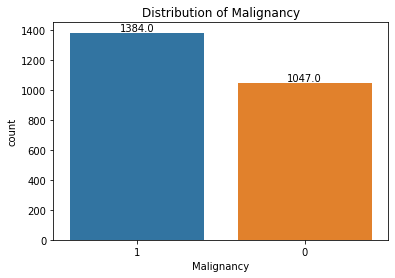

In [15]:
# If you want to order the bars by count, you can use the order parameter
order = merged_df['Malignancy_x'].value_counts().index
ax = sns.countplot(x='Malignancy', data=merged_df, order=order)

plt.title('Distribution of Malignancy')

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [17]:
merged_df=merged_df.drop(columns=['Patient_id','Malignancy_y'])
X = merged_df.drop('Malignancy_x', axis=1)
y = merged_df['Malignancy_x']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train

0          1          2          3         4          5  \
1862  0.000000  16.602090   0.000000   0.000000  0.000000   0.000000   
1099  0.000000   0.000000  13.318591  17.217860  9.235946   1.372411   
1525  2.730025   0.000000   0.000000  19.770214  4.422484   5.650371   
298   0.000000   0.000000   2.788574  10.799344  0.241903   3.866347   
927   0.000000   0.000000   0.000000   2.152484  3.660124  10.497616   
...        ...        ...        ...        ...       ...        ...   
1638  0.000000   1.975208   0.197319   0.000000  0.737131   4.570224   
1095  1.657308   2.670310   0.000000   5.679755  1.000189   1.878405   
1130  6.633171   0.000000   1.575818   0.000000  5.841607   0.000000   
1294  1.558608   0.000000   0.000000   0.000000  3.391122   2.713447   
860   7.994489   0.000000   3.796571   0.000000  1.423753   2.298024   

             6        7          8          9         10        11        12  \
1862  0.000000  0.00000  27.333225   0.000000  33.725933  0.000000  0.000000   
1099  4.097139  0.00000   6.214327   9.687061   0.000000  0.000000  8.578799   
1525  4.714899  0.00000   7.689311  16.857954   0.000000  0.000000  0.399612   
298   2.615385  5.15464   0.000000   8.194052   0.000000  0.000000  0.000000   
927   1.211756  0.00000   8.151223   8.817946  16.969778  1.912584  0.000000   
...        ...      ...        ...        ...        ...       ...       ...   
1638  6.097557  0.00000   0.000000   0.000000   0.000000  5.086879  0.000000   
1095  3.336427  0.00000   0.000000   1.862761   2.162618  1.925363  0.000000   
1130  0.000000  0.00000   0.000000   6.444299   0.000000  3.942323  6.801721   
1294  3.387018  0.00000   5.052823   0.000000   0.000000  9.752574  0.000000   
860   4.979032  0.00000   0.000000   0.363051   9.259416  5.949183  0.000000   

            13         14        15         16        17         18        19  \
1862  0.000000  21.019903  0.000000   0.000000  0.000000   0.000000  0.000000   
1099  0.000000   1.640579  5.095439   3.900043  5.524766  21.314840  8.044773   
1525  0.000000   6.443148  7.753110  11.790318  8.098810   8.974582  8.031583   
298   0.000000   3.506738  9.260851   8.624687  0.045272  15.494260  0.000000   
927   0.000000  10.219872  0.000000   0.000000  0.000000   0.000000  0.000000   
...        ...        ...       ...        ...       ...        ...       ...   
1638  1.168023   4.361753  0.000000   0.000000  0.000000   0.000000  8.285760   
1095  2.829783   0.132833  4.476896   4.181575  2.345537   8.040168  0.000000   
1130  0.000000   6.026307  1.960567   7.483900  4.454720   0.000000  0.000000   
1294  4.942664   1.891207  0.000000   0.000000  6.022996   3.976514  0.942681   
860   4.056451   4.860609  0.000000   1.030273  0.000000   0.000000  0.494295   

             20         21         22        23         24        25  \
1862  22.075163  16.332136  10.514609  0.000000  29.175024  0.000000   
1099   0.750994   0.000000   4.909629  0.000000   0.000000  0.000000   
1525   7.124768   3.045035   0.000000  0.000000   0.000000  3.886007   
298    1.735992   0.817432  10.804526  0.000000   0.000000  6.533120   
927   18.195960   9.010113  18.825073  0.000000   0.000000  0.000000   
...         ...        ...        ...       ...        ...       ...   
1638   0.803593   0.000000   0.000000  2.225942   0.544991  5.584168   
1095   2.764568   2.345647   0.000000  0.000000   0.474285  6.801345   
1130   0.705055   6.562679   0.000000  0.000000   7.022812  2.436871   
1294   0.000000   2.202192   2.187789  0.120360   9.147975  4.171526   
860    0.000000   3.804701   0.000000  0.000000  12.280836  0.000000   

            26         27        28         29         30        31  \
1862  0.000000  20.427240  0.367630   0.000000   6.715337  0.000000   
1099  3.716493   0.000000  0.000000   0.000000  10.262814  8.624751   
1525  7.186717   0.000000  4.947929   0.000000   0.000000  6.415898   
298   4.395080   0.000000  0.000000  13.838201  11.248079  3.5613

In [19]:
# Dictionary to store models and their accuracies
models = {
    
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier(random_state=42),   
}

In [20]:
# Train and evaluate each model
accuracies = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name]=accuracy

    print("-" * 30)
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print("Classification Report for Ensemble Model:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix for Ensemble Model:\n", confusion_matrix(y_test, y_pred))
    print("-" * 30)

Training Random Forest...
------------------------------
Accuracy for Random Forest: 0.9117
Classification Report for Ensemble Model:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       216
           1       0.90      0.94      0.92       271

    accuracy                           0.91       487
   macro avg       0.91      0.91      0.91       487
weighted avg       0.91      0.91      0.91       487

Confusion Matrix for Ensemble Model:
 [[189  27]
 [ 16 255]]
------------------------------
Training Support Vector Machine...
------------------------------
Accuracy for Support Vector Machine: 0.5565
Classification Report for Ensemble Model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.56      1.00      0.72       271

    accuracy                           0.56       487
   macro avg       0.28      0.50      0.36       487
weighted avg       0.

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

------------------------------
Accuracy for Neural Network: 0.5565
Classification Report for Ensemble Model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.56      1.00      0.72       271

    accuracy                           0.56       487
   macro avg       0.28      0.50      0.36       487
weighted avg       0.31      0.56      0.40       487

Confusion Matrix for Ensemble Model:
 [[  0 216]
 [  0 271]]
------------------------------


c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

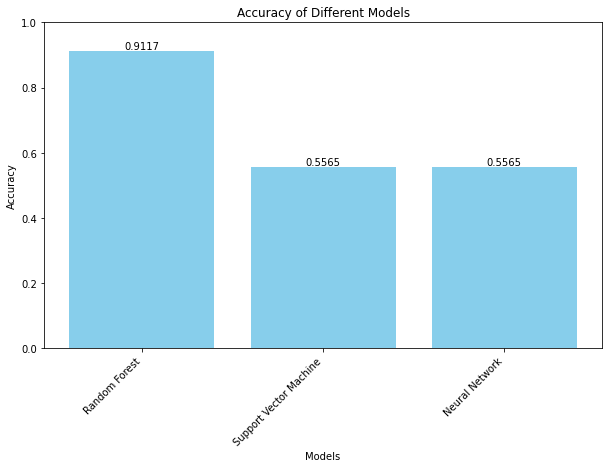

In [21]:
# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
for i, value in enumerate(accuracies):
    plt.annotate(f'{round(accuracies[value], 4)}', xy=(i, accuracies[value]), ha='center', va='bottom')
plt.ylim([0, 1])  # Set y-axis limit between 0 and 1
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()

In [22]:
for i, value in enumerate(accuracies):
    print(i,accuracies[value])

0 0.9117043121149897
1 0.5564681724845996
2 0.5564681724845996


In [23]:
accuracies

{'Random Forest': 0.9117043121149897,
 'Support Vector Machine': 0.5564681724845996,
 'Neural Network': 0.5564681724845996}

In [24]:
Final_accuracy={}
Final_accuracy['Accuracy Initial']=accuracies
Final_accuracy

{'Accuracy Initial': {'Random Forest': 0.9117043121149897,
  'Support Vector Machine': 0.5564681724845996,
  'Neural Network': 0.5564681724845996}}

Model Ananlysis ( StandardScaler)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Train and evaluate each model
accuracies = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name]=accuracy

    print("-" * 30)
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print("Classification Report for Ensemble Model:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix for Ensemble Model:\n", confusion_matrix(y_test, y_pred))
    print("-" * 30)

Training Random Forest...
------------------------------
Accuracy for Random Forest: 0.9117
Classification Report for Ensemble Model:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       216
           1       0.90      0.94      0.92       271

    accuracy                           0.91       487
   macro avg       0.91      0.91      0.91       487
weighted avg       0.91      0.91      0.91       487

Confusion Matrix for Ensemble Model:
 [[189  27]
 [ 16 255]]
------------------------------
Training Support Vector Machine...
------------------------------
Accuracy for Support Vector Machine: 0.5565
Classification Report for Ensemble Model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.56      1.00      0.72       271

    accuracy                           0.56       487
   macro avg       0.28      0.50      0.36       487
weighted avg       0.

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

------------------------------
Accuracy for Neural Network: 0.5565
Classification Report for Ensemble Model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.56      1.00      0.72       271

    accuracy                           0.56       487
   macro avg       0.28      0.50      0.36       487
weighted avg       0.31      0.56      0.40       487

Confusion Matrix for Ensemble Model:
 [[  0 216]
 [  0 271]]
------------------------------


c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
for i, value in enumerate(accuracies):
    plt.annotate(f'{round(accuracies[value], 4)}', xy=(i, accuracies[value]), ha='center', va='bottom')
plt.ylim([0, 1])  # Set y-axis limit between 0 and 1
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
Final_accuracy['Accuracy standardization']=accuracies
Final_accuracy

LASSO

In [ ]:
X = df.drop('Malignancy', axis=1)
y = df['Malignancy']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X.head()


In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create and fit LASSO model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
lasso = Lasso()
lasso.fit(X_train, y_train)

# Get selected features by non-zero coefficients
selected_features_lasso = X_train.columns[lasso.coef_ != 0]

# Print selected features
print("LASSO selected features:", len(selected_features_lasso))

In [ ]:
X=df[selected_features_lasso]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
# Train and evaluate each model
accuracies = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name]=accuracy

    print("-" * 30)
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print("Classification Report for Ensemble Model:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix for Ensemble Model:\n", confusion_matrix(y_test, y_pred))
    print("-" * 30)

In [ ]:
# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
for i, value in enumerate(accuracies):
    plt.annotate(f'{round(accuracies[value], 4)}', xy=(i, accuracies[value]), ha='center', va='bottom')
plt.ylim([0, 1])  # Set y-axis limit between 0 and 1
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
Final_accuracy['Accuracy Lasso ']=accuracies


PCA

In [ ]:
df=merged_df
df=df.drop(columns=['Patient_id','nodule no'])
X = df.drop('Malignancy', axis=1)
y = df['Malignancy']

# Split the dataset into training and testing sets


# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

In [ ]:
X_standardized.shape

In [ ]:
# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

# Fit PCA with different numbers of components
max_components = min(X.shape[0], X.shape[1])  # Maximum number of components is the minimum of rows and columns
explained_variances = []
max_components=250
for n_components in range(1, max_components + 1):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_standardized)
    explained_variances.append(sum(pca.explained_variance_ratio_))

# Plot the explained variances
plt.plot(range(1, max_components + 1), explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
X

In [ ]:
optimal_n_components = 220  # Replace with the number you determined
pca = PCA(n_components=optimal_n_components)
X_pca = pca.fit_transform(X_standardized)

# Get the original column names
original_columns = X.columns

# Create a DataFrame with the principal components and their contributions
pca_columns = [f'PC{i+1}' for i in range(optimal_n_components)]
X = pd.DataFrame(data=X_pca, columns=pca_columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train and evaluate each model
accuracies = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name]=accuracy

    print("-" * 30)
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print("Classification Report for Ensemble Model:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix for Ensemble Model:\n", confusion_matrix(y_test, y_pred))
    print("-" * 30)

In [ ]:
# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
for i, value in enumerate(accuracies):
    plt.annotate(f'{round(accuracies[value], 4)}', xy=(i, accuracies[value]), ha='center', va='bottom')
plt.ylim([0, 1])  # Set y-axis limit between 0 and 1
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
Final_accuracy['Accuracy PCA 200 Features']=accuracies
Final_accuracy

In [ ]:
Final_accuracy

Oversampling the minority Class

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming your dataframe is named 'df' and 'Malignancy' is the target column
df=merged_df



# Separate features (X) and target variable (y)
df=df.drop(columns=['Patient_id', 'nodule no'])
X = df.drop('Malignancy', axis=1)
y = df['Malignancy']


# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Malignancy')], axis=1)

print(df_resampled['Malignancy'].value_counts())

In [ ]:
X = df_resampled.drop('Malignancy', axis=1)
y = df_resampled['Malignancy']

# Split the dataset into training and testing sets


# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

optimal_n_components = 220  # Replace with the number you determined
pca = PCA(n_components=optimal_n_components)
X_pca = pca.fit_transform(X_standardized)

# Get the original column names
original_columns = X.columns

# Create a DataFrame with the principal components and their contributions
pca_columns = [f'PC{i+1}' for i in range(optimal_n_components)]
X = pd.DataFrame(data=X_pca, columns=pca_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

In [ ]:
# Train and evaluate each model
accuracies = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name]=accuracy

    print("-" * 30)
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print("Classification Report for Ensemble Model:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix for Ensemble Model:\n", confusion_matrix(y_test, y_pred))
    print("-" * 30)

In [ ]:
# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
for i, value in enumerate(accuracies):
    plt.annotate(f'{round(accuracies[value], 4)}', xy=(i, accuracies[value]), ha='center', va='bottom')
plt.ylim([0, 1])  # Set y-axis limit between 0 and 1
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
Final_accuracy['Accuracy PCA 220 Oversampling']=accuracies

In [ ]:
X = df_resampled.drop('Malignancy', axis=1)
y = df_resampled['Malignancy']

# Split the dataset into training and testing sets


# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train and evaluate each model
accuracies = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name]=accuracy

    print("-" * 30)
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print("Classification Report for Ensemble Model:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix for Ensemble Model:\n", confusion_matrix(y_test, y_pred))
    print("-" * 30)

In [ ]:
# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
for i, value in enumerate(accuracies):
    plt.annotate(f'{round(accuracies[value], 4)}', xy=(i, accuracies[value]), ha='center', va='bottom')
plt.ylim([0, 1])  # Set y-axis limit between 0 and 1
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset (replace 'X' and 'y' with your features and labels)
# X, y = load_your_dataset()
X = df_resampled.drop('Malignancy', axis=1)
y = df_resampled['Malignancy']

# Split the dataset into training and testing sets

# Standardize the data (important for PCA)
X_standardized = StandardScaler().fit_transform(X)

optimal_n_components = 220  # Replace with the number you determined
pca = PCA(n_components=optimal_n_components)
X_pca = pca.fit_transform(X_standardized)

# Get the original column names
original_columns = X.columns

# Create a DataFrame with the principal components and their contributions
pca_columns = [f'PC{i+1}' for i in range(optimal_n_components)]
X_pca_df = pd.DataFrame(data=X_pca, columns=pca_columns)

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
# Split the dataset into K folds
acc_model={}
for name, model in models.items():
    print(f"Training {name}...")
    accuracies = []
    for fold, (train_indices, test_indices) in enumerate(kf.split(X_pca_df)):
        print(f"Fold {fold + 1}:")
        
        # Split the data into training and test sets for this fold
        X_train, X_test = X_pca_df.iloc[train_indices], X_pca_df.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
        
        # Optionally, further split the training set into training and validation sets
        # X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
        
        
        model.fit(X_train, y_train)
            
            # Make predictions on the test set
        y_pred = model.predict(X_test)
            
            # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

        print("-" * 30)
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print("Classification Report for Ensemble Model:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix for Ensemble Model:\n", confusion_matrix(y_test, y_pred))
            
        # Initialize and train your machine learning model (replace with your model)
    
        
        # Evaluate the model's performance (replace with your desired metric)
    acc_model[name]  =sum(accuracy_scores)/len(accuracy_scores)

acc_model

In [ ]:
Final_accuracy['Accuracy PCM 220 Oversample 5fold']=acc_model
Final_accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load your dataset (replace 'X' and 'y' with your features and labels)
# X, y = load_your_data()
X = X_pca_df
y = y

# Split the dataset into training and testing sets


In [ ]:
import matplotlib.pyplot as plt

# Your data
data = {
    'Accuracy Initial': {'Random Forest': 0.7365, 'Support Vector Machine': 0.7515, 'Neural Network': 0.2515},
    'Accuracy standardization': {'Random Forest': 0.7365, 'Support Vector Machine': 0.7515, 'Neural Network': 0.2515},
    'Accuracy Lasso': {'Random Forest': 0.7725, 'Support Vector Machine': 0.7485, 'Neural Network': 0.2545},
    'Accuracy PCA 200 Features': {'Random Forest': 0.7485, 'Support Vector Machine': 0.7635, 'Neural Network': 0.7246},
    'Accuracy PCA 200 Oversampling': {'Random Forest': 0.9277, 'Support Vector Machine': 0.7450, 'Neural Network': 0.8373},
    'Accuracy PCM 200_Oversample 5fold': {'Random Forest': 0.9360, 'Support Vector Machine': 0.8333, 'Neural Network': 0.8379}
}

# Extract model names and corresponding accuracies for each scenario
scenarios = list(data.keys())
models = list(data[scenarios[0]].keys())

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for model in models:
    accuracies = [data[scenario][model] for scenario in scenarios]
    ax.bar(scenarios, accuracies, label=model)

# Adding labels and title
ax.set_xlabel('Scenarios')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Under Different Scenarios')
ax.legend()

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = {
    'Accuracy Initial': {'Random Forest': 0.7365, 'Support Vector Machine': 0.7515, 'Neural Network': 0.2515},
    'Accuracy standardization': {'Random Forest': 0.7365, 'Support Vector Machine': 0.7515, 'Neural Network': 0.2515},
    'Accuracy Lasso': {'Random Forest': 0.7725, 'Support Vector Machine': 0.7485, 'Neural Network': 0.2545},
    'Accuracy PCA 200 Features': {'Random Forest': 0.7485, 'Support Vector Machine': 0.7635, 'Neural Network': 0.7246},
    'Accuracy PCA 200 Oversampling': {'Random Forest': 0.9277, 'Support Vector Machine': 0.7450, 'Neural Network': 0.8373},
    'Accuracy PCM 200_Oversample 5fold': {'Random Forest': 0.9360, 'Support Vector Machine': 0.8333, 'Neural Network': 0.8379}
}

# Extract model names and corresponding accuracies for each scenario
scenarios = list(data.keys())
models = list(data[scenarios[0]].keys())

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, model in enumerate(models):
    accuracies = [data[scenario][model] for scenario in scenarios]
    axes[i].bar(scenarios, accuracies)
    axes[i].set_title(f'{model} Accuracy')
    axes[i].set_ylim(0, 1)

# Adding labels and title
fig.suptitle('Model Accuracy Under Different Scenarios', fontsize=16)
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = {
    'Accuracy Initial': {'Random Forest': 0.7365, 'Support Vector Machine': 0.7515, 'Neural Network': 0.2515},
    'Accuracy standardization': {'Random Forest': 0.7365, 'Support Vector Machine': 0.7515, 'Neural Network': 0.2515},
    'Accuracy Lasso': {'Random Forest': 0.7725, 'Support Vector Machine': 0.7485, 'Neural Network': 0.2545},
    'Accuracy PCA 200 Features': {'Random Forest': 0.7485, 'Support Vector Machine': 0.7635, 'Neural Network': 0.7246},
    'Accuracy PCA 200 Oversampling': {'Random Forest': 0.9277, 'Support Vector Machine': 0.7450, 'Neural Network': 0.8373},
    'Accuracy PCM 200 Oversample 5fold': {'Random Forest': 0.9360, 'Support Vector Machine': 0.8333, 'Neural Network': 0.8379}
}

# Extract model names and corresponding accuracies for each scenario
scenarios = list(data.keys())
models = list(data[scenarios[0]].keys())

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
bar_positions = np.arange(len(scenarios))

for i, model in enumerate(models):
    accuracies = [data[scenario][model] for scenario in scenarios]
    ax.bar(bar_positions + i * bar_width, accuracies, width=bar_width, label=model)

# Adding labels and title
ax.set_xlabel('Scenarios')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Under Different Scenarios')
ax.set_xticks(bar_positions + bar_width,rotation=45, ha="right")
ax.set_xticklabels(scenarios)
ax.legend()

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = {
    'Accuracy Initial': {'Random Forest': 0.7365, 'Support Vector Machine': 0.7515, 'Neural Network': 0.2515},
    'Accuracy standardization': {'Random Forest': 0.7365, 'Support Vector Machine': 0.7515, 'Neural Network': 0.2515},
    'Accuracy Lasso': {'Random Forest': 0.7725, 'Support Vector Machine': 0.7485, 'Neural Network': 0.2545},
    'Accuracy PCA 200 Features': {'Random Forest': 0.7485, 'Support Vector Machine': 0.7635, 'Neural Network': 0.7246},
    'Accuracy PCA 200 Oversampling': {'Random Forest': 0.9277, 'Support Vector Machine': 0.7450, 'Neural Network': 0.8373},
    'Accuracy PCM 200_Oversample 5fold': {'Random Forest': 0.9360, 'Support Vector Machine': 0.8333, 'Neural Network': 0.8379}
}

# Extract model names and corresponding accuracies for each scenario
scenarios = list(data.keys())
models = list(data[scenarios[0]].keys())

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
bar_positions = np.arange(len(scenarios))

for i, model in enumerate(models):
    accuracies = [data[scenario][model] for scenario in scenarios]
    ax.bar(bar_positions + i * bar_width, accuracies, width=bar_width, label=model)

# Adding labels and title
ax.set_xlabel('Scenarios')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Under Different Scenarios')
ax.set_xticks(bar_positions + bar_width * 1.5)
ax.set_xticklabels(scenarios, rotation=45, ha='right')  # Rotate labels by 45 degrees
ax.legend()

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = {'Accuracy Initial': {'Random Forest': 0.7777777777777778,
  'Support Vector Machine': 0.7597597597597597,
  'Neural Network': 0.7597597597597597},
 'Accuracy standardization': {'Random Forest': 0.7777777777777778,
  'Support Vector Machine': 0.7597597597597597,
  'Neural Network': 0.7597597597597597},
 'Accuracy Lasso ': {'Random Forest': 0.7447447447447447,
  'Support Vector Machine': 0.7387387387387387,
  'Neural Network': 0.7447447447447447},
 'Accuracy PCA 200 Features': {'Random Forest': 0.7777777777777778,
  'Support Vector Machine': 0.7867867867867868,
  'Neural Network': 0.7777777777777778},
 'Accuracy PCA 200 Oversampling': {'Random Forest': 0.9236947791164659,
  'Support Vector Machine': 0.7449799196787149,
  'Neural Network': 0.8413654618473896},
 'Accuracy PCA 220 Oversampling': {'Random Forest': 0.9395161290322581,
  'Support Vector Machine': 0.842741935483871,
  'Neural Network': 0.905241935483871},
 'Accuracy PCM 220 Oversample 5fold': {'Random Forest': 0.9451612903225808,
  'Support Vector Machine': 0.8917338709677421,
  'Neural Network': 0.9005376344086023}}

# Extract model names and corresponding accuracies for each scenario
scenarios = list(data.keys())
models = list(data[scenarios[0]].keys())

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.25
bar_positions = np.arange(len(scenarios))

for i, model in enumerate(models):
    accuracies = [data[scenario][model] for scenario in scenarios]
    bars = ax.bar(bar_positions + i * bar_width, accuracies, width=bar_width, label=model)
    
    # Annotate each bar with its accuracy value
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

# Adding labels and title
ax.set_xlabel('Scenarios')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Under Different Scenarios[Fused Features]')
ax.set_xticks(bar_positions + bar_width * 1.5)
ax.set_xticklabels(scenarios, rotation=45, ha='right')  # Rotate labels by 45 degrees
ax.legend()

# Display the plot
plt.show()


In [ ]:


from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset (replace 'X' and 'y' with your features and labels)
# X, y = load_your_dataset()
X = df_resampled.drop('Malignancy', axis=1)
y = df_resampled['Malignancy']

# Split the dataset into training and testing sets

# Standardize the data (important for PCA)
X_standardized = StandardScaler().fit_transform(X)

optimal_n_components = 220  # Replace with the number you determined
pca = PCA(n_components=optimal_n_components)
X_pca = pca.fit_transform(X_standardized)

# Get the original column names
original_columns = X.columns

# Create a DataFrame with the principal components and their contributions
pca_columns = [f'PC{i+1}' for i in range(optimal_n_components)]
X_pca_df = pd.DataFrame(data=X_pca, columns=pca_columns)

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
# Split the dataset into K folds
accuracies = []
model=RandomForestClassifier(random_state=42)
for fold, (train_indices, test_indices) in enumerate(kf.split(X_pca_df)):
        print(f"Fold {fold + 1}:")
        
        # Split the data into training and test sets for this fold
        X_train, X_test = X_pca_df.iloc[train_indices], X_pca_df.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
        
        # Optionally, further split the training set into training and validation sets
        # X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
        
        
        model.fit(X_train, y_train)
            
            # Make predictions on the test set
        y_pred = model.predict(X_test)
            
            # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

        print("-" * 30)
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print("Classification Report for Ensemble Model:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix for Ensemble Model:\n", confusion_matrix(y_test, y_pred))

In [ ]:
import joblib
model=RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'Fused_ML_model.joblib')